### importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os, sys 

In [2]:
# Get the current working directory
current_directory = os.getcwd()

# Get the parent directory (fraud_detection)
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))

# Add the parent directory to sys.path
sys.path.append(parent_directory)

print(sys.path)
# Now try to import the module
from src import data_load

['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/olani/Documents/kifiya/week8&9/fraud_detection/.venv/lib/python3.12/site-packages', '/home/olani/Documents/kifiya/week8&9/fraud_detection']


In [3]:
from importlib import reload
import src.data_load
reload(src.data_load)

<module 'src.data_processing' from '/home/olani/Documents/kifiya/week8&9/fraud_detection/src/data_processing.py'>

### importing packages & module

In [4]:
from src.data_load import load_fraud_data, load_address_data, load_creditcard_data

### loading our data

In [5]:
fraud_data = load_fraud_data("../data/raw/Fraud_Data.csv")
IpAddress = load_address_data("../data/raw/IpAddress_to_Country.csv")
creditcard = load_creditcard_data("../data/raw/creditcard.csv")

Fraud data loaded successfully!
Address data loaded successfully!
Credit card data loaded successfully!


### data inspection

In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [8]:
IpAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
IpAddress.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [10]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### converting data types

In [12]:
# Convert IP addresses to integer format
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')
IpAddress['lower_bound_ip_address'] = IpAddress['lower_bound_ip_address'].astype('int64')
IpAddress['upper_bound_ip_address'] = IpAddress['upper_bound_ip_address'].astype('int64')

In [13]:
# Convert 'signup_time' and 'purchase_time' to datetime format
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], format='%Y-%m-%d %H:%M:%S')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], format='%Y-%m-%d %H:%M:%S')

In [14]:
# Convert 'Time' column into timedelta
creditcard['Time'] = pd.to_timedelta(creditcard['Time'], unit='s')

### removing dduplicates if there is any

In [16]:
# Remove duplicates from fraud_data
fraud_data = fraud_data.drop_duplicates()

# Remove duplicates from IpAddress_to_Country
IpAddress = IpAddress.drop_duplicates()

# Remove duplicates from creditcard data
creditcard = creditcard.drop_duplicates()

### saving the processed data

In [17]:
# Saving the cleaned DataFrames to CSV files
fraud_data.to_csv('../data/processed/fraud_data.csv', index=False)
IpAddress.to_csv('../data/processed/IpAddress.csv', index=False)
creditcard.to_csv('../data/processed/creditcard.csv', index=False)

### Univariate Analysis

**For Numerical Features:**
- Summary statistics (mean, median, standard deviation, etc.)
- Visualizations: Histograms and box plots.

**For Categorical Features:**
- Frequency counts
- Visualizations: Bar plots

In [18]:
# Fraud Data - Numerical Features
print("Summary Statistics - Fraud Data:")
fraud_data.describe()

Summary Statistics - Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09,0.093646
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209300e+04,0.000000
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09,1.000000
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09,0.291336


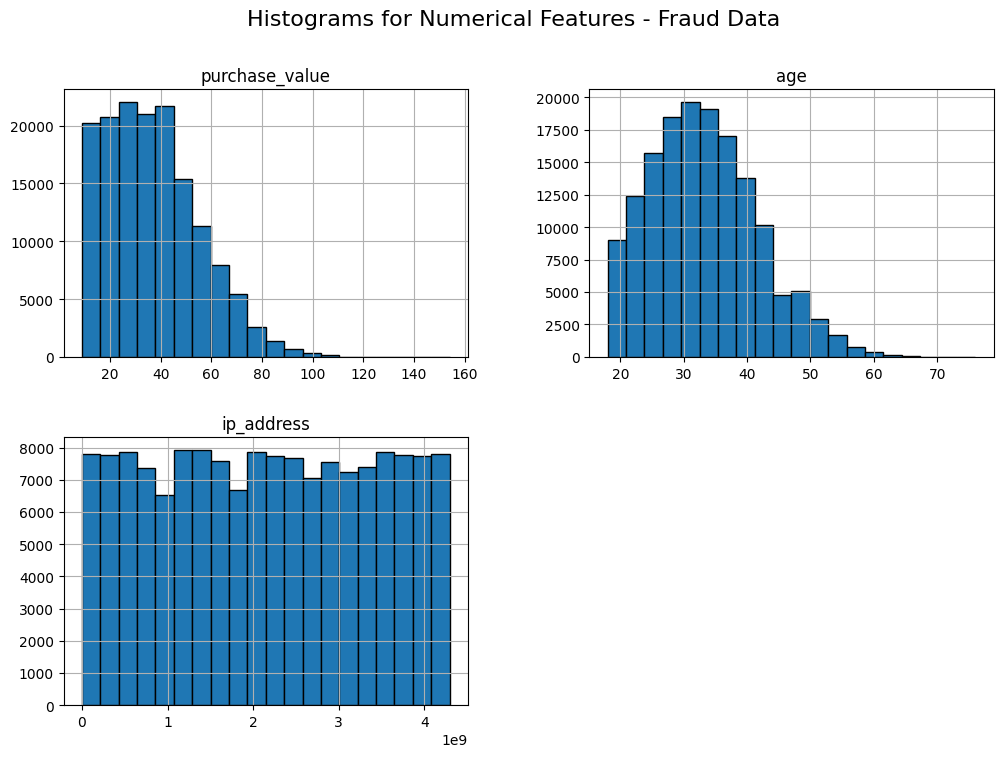

In [38]:
# Plot histograms for numerical features
numerical_columns = ['purchase_value', 'age', 'ip_address']
fraud_data[numerical_columns].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograms for Numerical Features - Fraud Data', size=16)
plt.show()

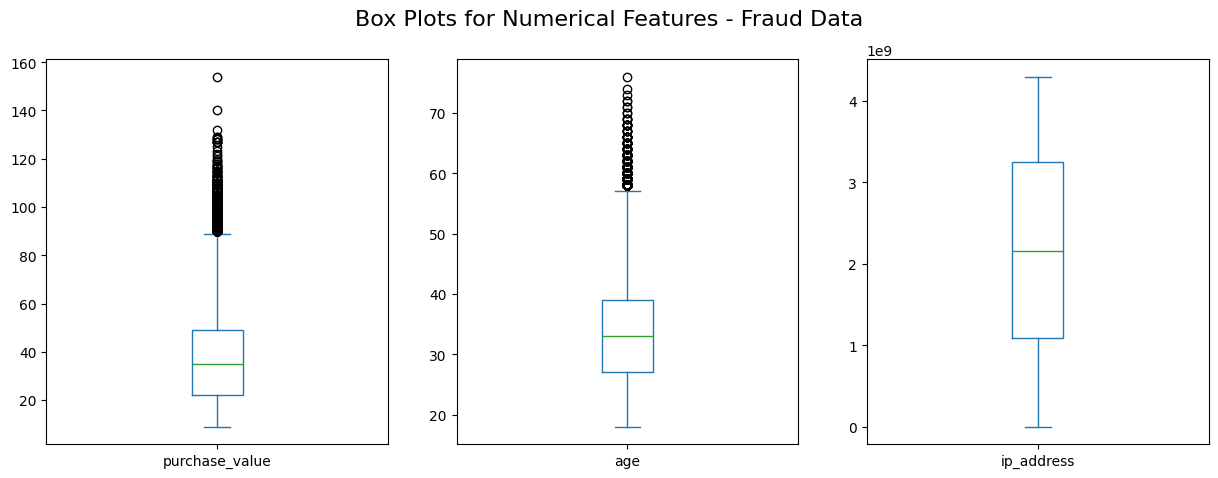

In [39]:
# Box plots for numerical features to identify outliers
fraud_data[numerical_columns].plot(kind='box', subplots=True, layout=(1, 3), figsize=(15, 5), sharey=False)
plt.suptitle('Box Plots for Numerical Features - Fraud Data', size=16)
plt.show()


Categorical Feature Counts - Fraud Data:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64


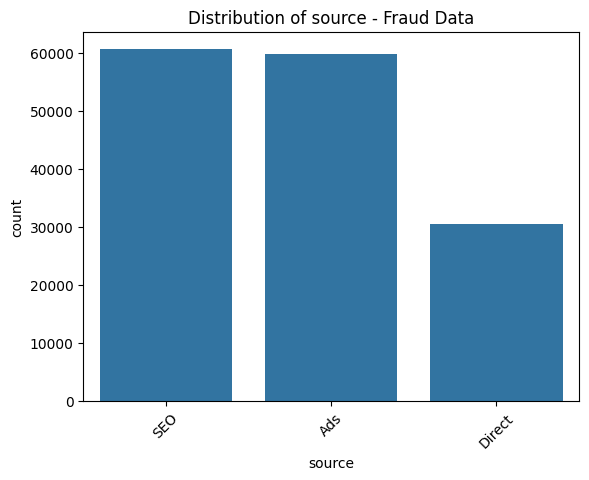

browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64


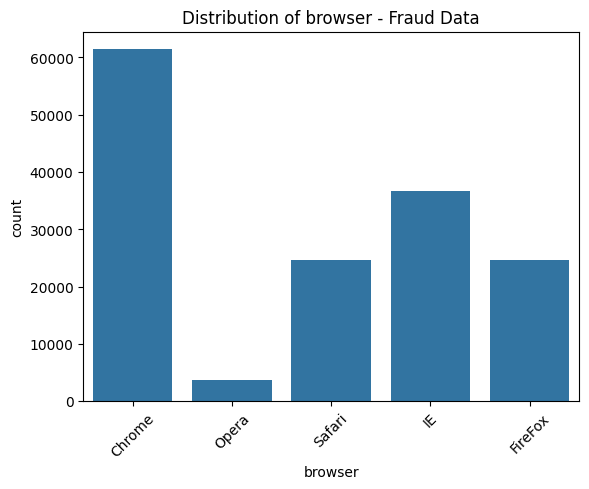

sex
M    88293
F    62819
Name: count, dtype: int64


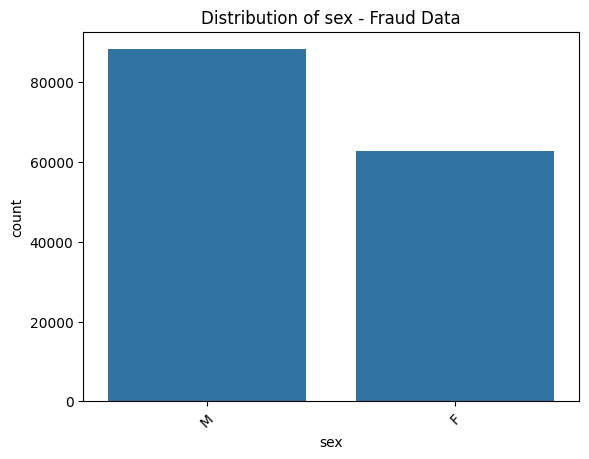

In [31]:
# Fraud Data - Categorical Features
print("\nCategorical Feature Counts - Fraud Data:")
categorical_columns = ['source', 'browser', 'sex']
for col in categorical_columns:
    print(fraud_data[col].value_counts())
    sns.countplot(x=col, data=fraud_data)
    plt.title(f'Distribution of {col} - Fraud Data')
    plt.xticks(rotation=45)
    plt.show()

In [32]:
# Credit Card Data - Summary Statistics
print("\nSummary Statistics - Credit Card Data:")
creditcard.describe()


Summary Statistics - Credit Card Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,1 days 02:20:11.077599515,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,0 days 13:11:21.047890619,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0 days 00:00:00,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,0 days 15:03:24.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,0 days 23:31:32.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,1 days 14:41:38,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,1 days 23:59:52,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


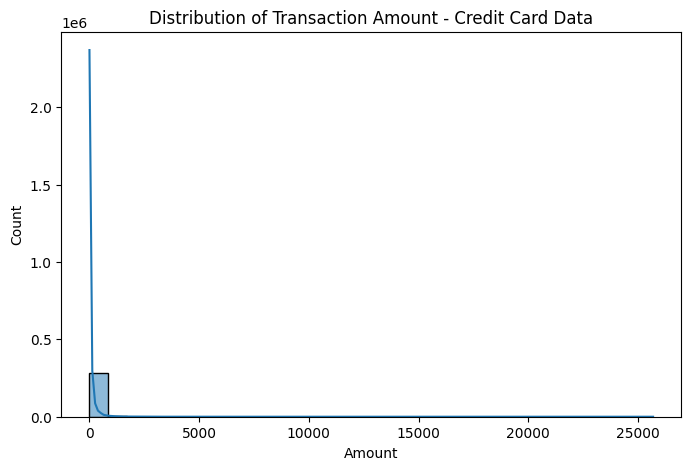

In [33]:
# Histograms for the 'Amount' feature in Credit Card data
plt.figure(figsize=(8, 5))
sns.histplot(creditcard['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount - Credit Card Data')
plt.show()

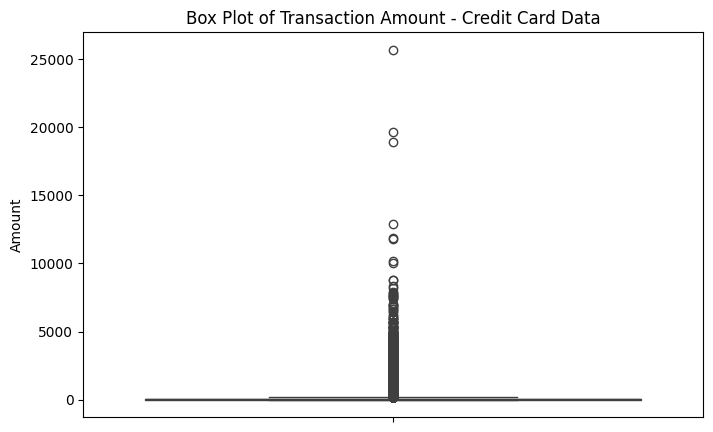

In [34]:
# Box plot for 'Amount' to check for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(creditcard['Amount'])
plt.title('Box Plot of Transaction Amount - Credit Card Data')
plt.show()

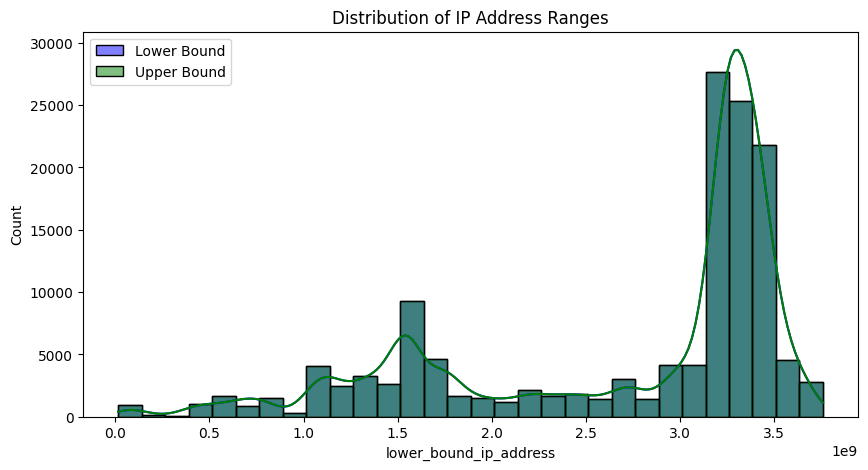

In [36]:
# Plot histograms for IP address range
plt.figure(figsize=(10, 5))
sns.histplot(IpAddress['lower_bound_ip_address'], bins=30, kde=True, color='blue', label='Lower Bound')
sns.histplot(IpAddress['upper_bound_ip_address'], bins=30, kde=True, color='green', label='Upper Bound')
plt.title('Distribution of IP Address Ranges')
plt.legend()
plt.show()

### Bivariate Analysis Steps:

**Numerical vs. Numerical:**
- Scatter plots and correlation heatmaps.

**Numerical vs. Categorical:**
- Box plots to visualize distributions across categories.

**Categorical vs. Categorical:**
- Cross-tabulation and bar plots to see frequency distributions.

#### Bivariate Analysis - Fraud Data

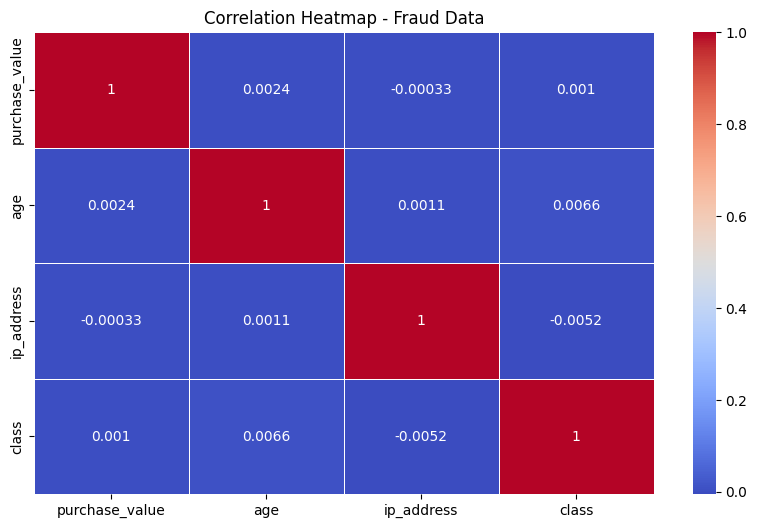

In [40]:
# 1. Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 6))
corr_matrix = fraud_data[['purchase_value', 'age', 'ip_address', 'class']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Fraud Data')
plt.show()

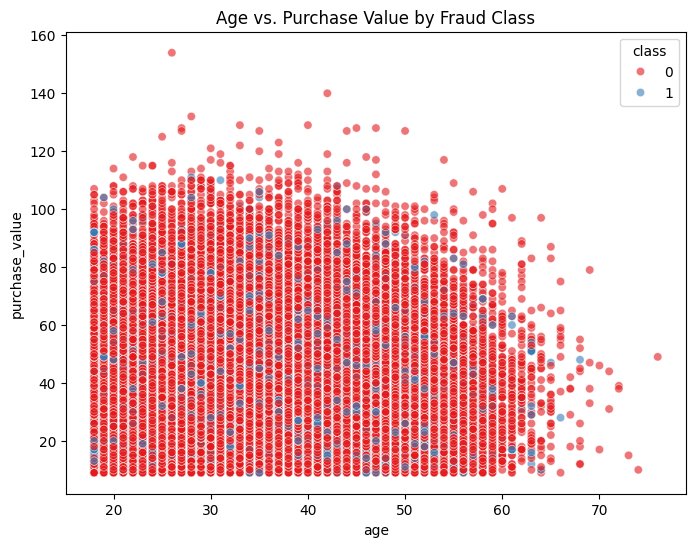

In [41]:
# 2. Scatter Plot - Age vs Purchase Value colored by Fraud Class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='purchase_value', hue='class', data=fraud_data, palette='Set1', alpha=0.6)
plt.title('Age vs. Purchase Value by Fraud Class')
plt.show()

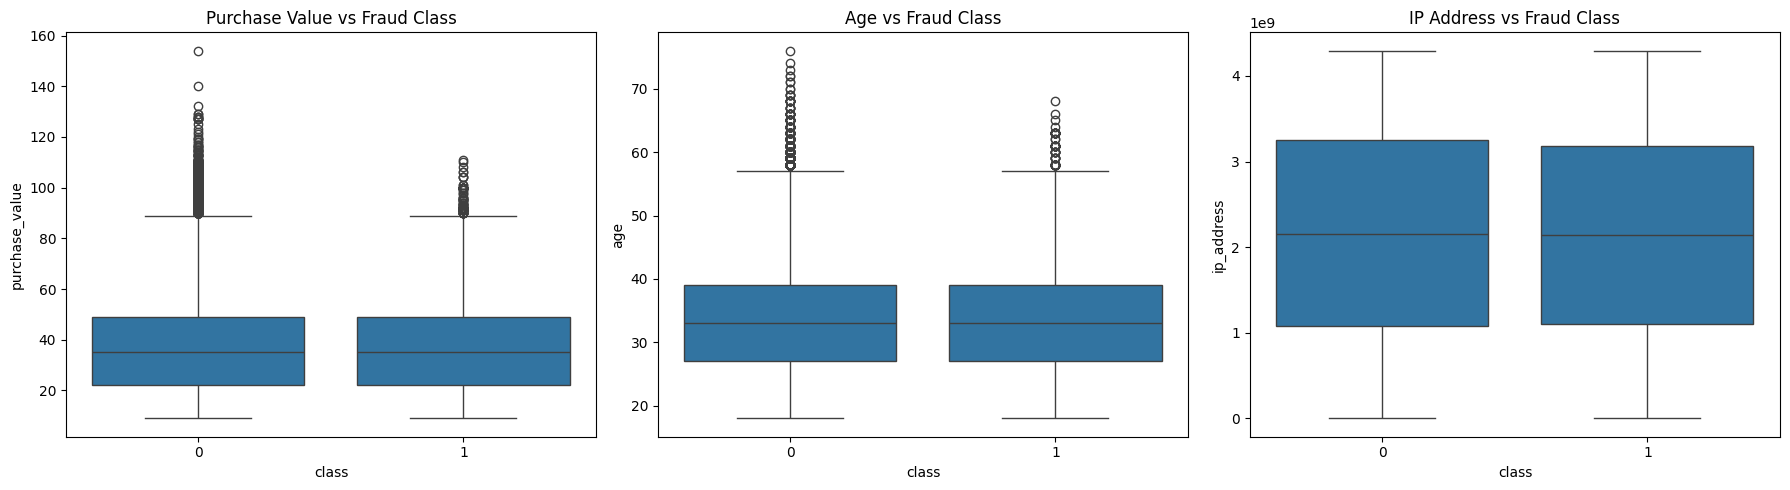

In [42]:
# 3. Box Plots - Numerical Features against Fraud Class (class)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='class', y='purchase_value', data=fraud_data, ax=ax[0])
ax[0].set_title('Purchase Value vs Fraud Class')

sns.boxplot(x='class', y='age', data=fraud_data, ax=ax[1])
ax[1].set_title('Age vs Fraud Class')

sns.boxplot(x='class', y='ip_address', data=fraud_data, ax=ax[2])
ax[2].set_title('IP Address vs Fraud Class')

plt.tight_layout()
plt.show()

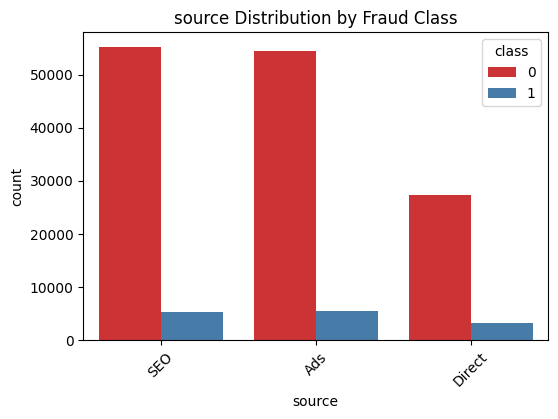

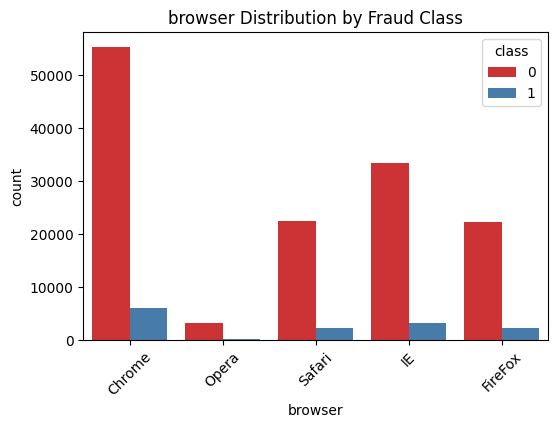

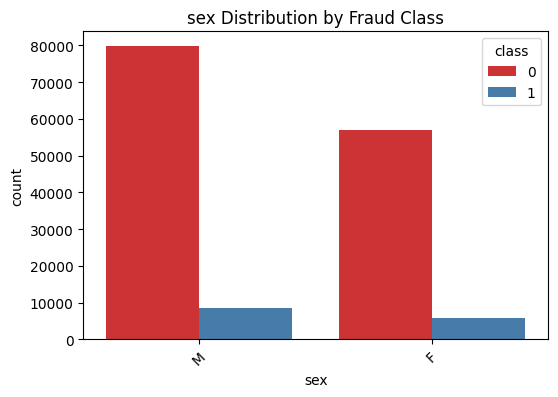

In [43]:
# 4. Bar plots for Categorical Features vs Fraud Class
categorical_columns = ['source', 'browser', 'sex']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='class', data=fraud_data, palette='Set1')
    plt.title(f'{col} Distribution by Fraud Class')
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis - Credit Card Data

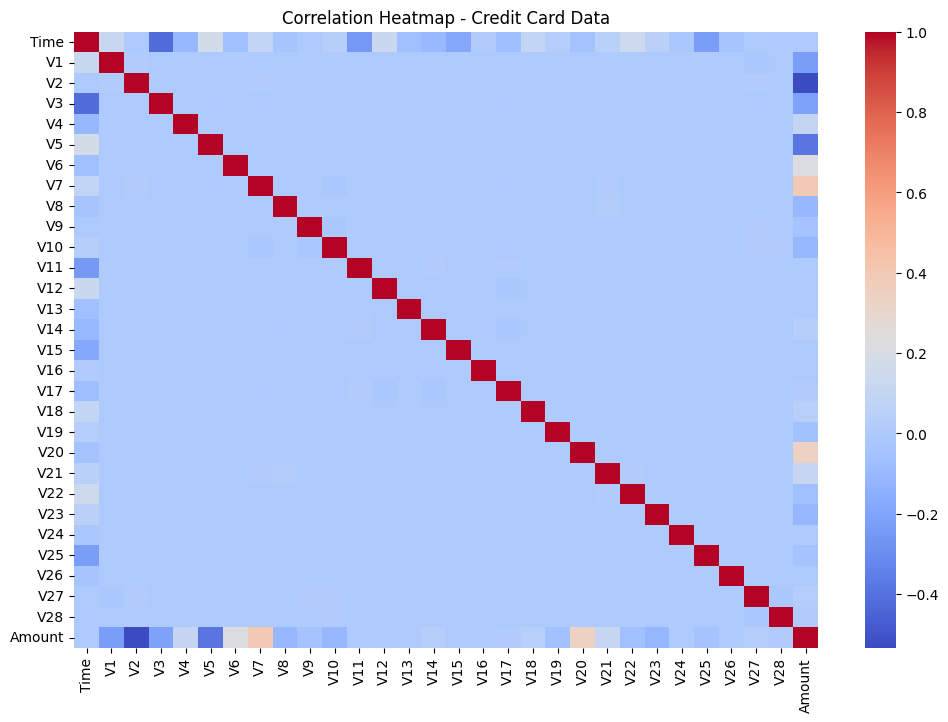

In [44]:
# 1. Correlation Heatmap for Credit Card Data
plt.figure(figsize=(12, 8))
corr_matrix_cc = creditcard.drop(columns='Class').corr()
sns.heatmap(corr_matrix_cc, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap - Credit Card Data')
plt.show()

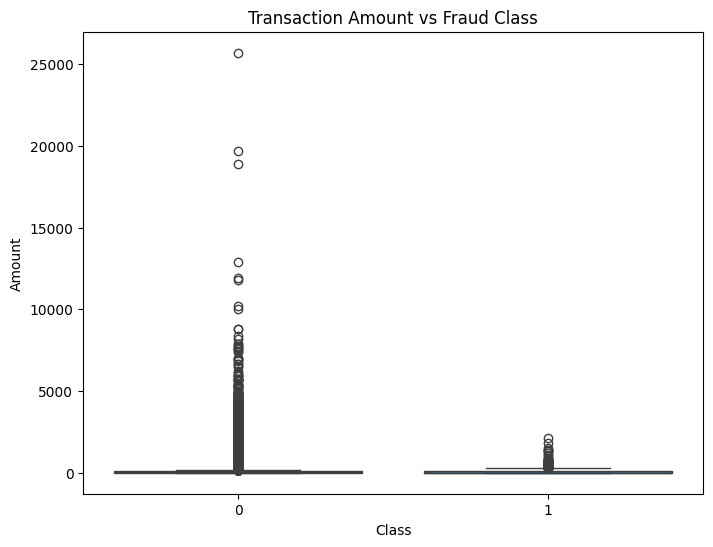

In [45]:
# 2. Box Plot for Amount vs Fraud Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=creditcard)
plt.title('Transaction Amount vs Fraud Class')
plt.show()

#### Bivariate Analysis - IP Address Data

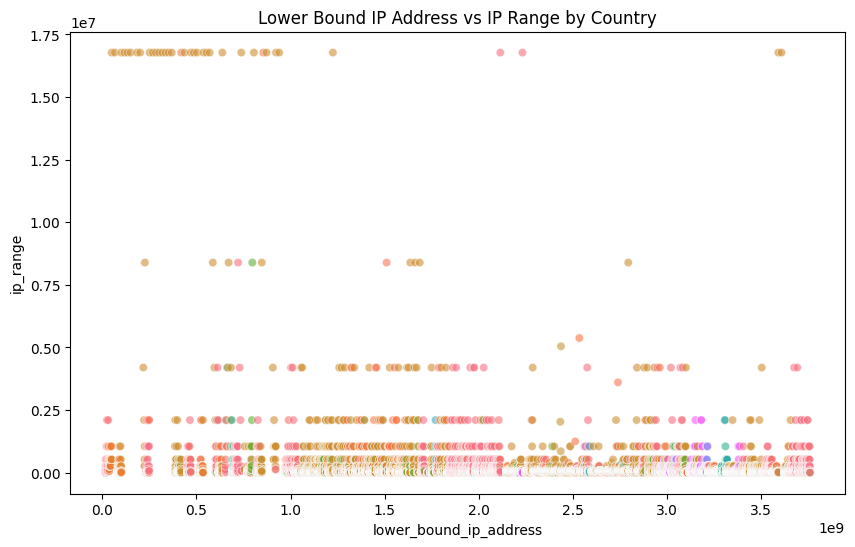

In [46]:
# Scatter plot to check relation between IP range and country (binned)
IpAddress['ip_range'] = IpAddress['upper_bound_ip_address'] - IpAddress['lower_bound_ip_address']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lower_bound_ip_address', y='ip_range', hue='country', data=IpAddress, alpha=0.6, legend=None)
plt.title('Lower Bound IP Address vs IP Range by Country')
plt.show()

### Merging Datasets for Geolocation Analysis

In [65]:
# Sorting datasets to prepare for merge_asof (required for range-based joins)
fraud_data_sorted = fraud_data.sort_values(by='ip_address')
IpAddress_sorted = IpAddress.sort_values(by='lower_bound_ip_address')

In [66]:
# Merging fraud data with IP geolocation data based on IP address ranges
merged_data = pd.merge_asof(
    fraud_data_sorted, 
    IpAddress_sorted, 
    left_on='ip_address', 
    right_on='lower_bound_ip_address', 
    direction='backward',
    suffixes=('', '_ip')
)

# Filtering to ensure IP addresses fall within the correct range
merged_data = merged_data[merged_data['ip_address'] <= merged_data['upper_bound_ip_address']]


# Checking the resulting DataFrame
merged_data.info()
merged_data[['ip_address', 'country', 'class']].head()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   user_id                 129146 non-null  int64         
 1   signup_time             129146 non-null  datetime64[ns]
 2   purchase_time           129146 non-null  datetime64[ns]
 3   purchase_value          129146 non-null  int64         
 4   device_id               129146 non-null  object        
 5   source                  129146 non-null  object        
 6   browser                 129146 non-null  object        
 7   sex                     129146 non-null  object        
 8   age                     129146 non-null  int64         
 9   ip_address              129146 non-null  int64         
 10  class                   129146 non-null  int64         
 11  lower_bound_ip_address  129146 non-null  float64       
 12  upper_bound_ip_address  129146 no

,ip_address,country,class
634,16778864,Australia,0
635,16842045,Thailand,0
636,16843656,China,0
637,16938732,China,0
638,16971984,Thailand,0


### Feature Engineering

In [67]:
# 1. Calculate Transaction Frequency
transaction_frequency = merged_data.groupby('user_id').size().reset_index(name='transaction_frequency')

# 2. Calculate Transaction Velocity (Average purchase value per user)
transaction_velocity = merged_data.groupby('user_id')['purchase_value'].mean().reset_index(name='transaction_velocity')

# Merging the frequency and velocity into the merged_data DataFrame
merged_data = merged_data.merge(transaction_frequency, on='user_id', how='left')
merged_data = merged_data.merge(transaction_velocity, on='user_id', how='left')

# 3. Time-Based Features
merged_data['hour_of_day'] = merged_data['purchase_time'].dt.hour
merged_data['day_of_week'] = merged_data['purchase_time'].dt.day_name()

# Display the updated merged_data DataFrame
merged_data[['user_id', 'purchase_time', 'transaction_frequency', 'transaction_velocity', 'hour_of_day', 'day_of_week']].head()

,user_id,purchase_time,transaction_frequency,transaction_velocity,hour_of_day,day_of_week
0,247547,2015-08-09 03:57:29,1,47.0,3,Sunday
1,220737,2015-02-11 20:28:28,1,15.0,20,Wednesday
2,390400,2015-04-11 23:41:23,1,44.0,23,Saturday
3,69592,2015-05-23 16:40:14,1,55.0,16,Saturday
4,174987,2015-11-03 04:04:30,1,51.0,4,Tuesday


### Normalization and Scaling

In [68]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [69]:
features_to_scale = ['purchase_value', 'transaction_frequency', 'transaction_velocity']

# Create copies of the scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalization: Scaling features to [0, 1]
merged_data[features_to_scale] = minmax_scaler.fit_transform(merged_data[features_to_scale])


In [70]:
# Display the updated merged_data DataFrame
merged_data[features_to_scale].head()

,purchase_value,transaction_frequency,transaction_velocity
0,0.262069,0.0,0.262069
1,0.041379,0.0,0.041379
2,0.241379,0.0,0.241379
3,0.317241,0.0,0.317241
4,0.289655,0.0,0.289655


### Encode Categorical Features

In [71]:
from sklearn.preprocessing import LabelEncoder

# Categorical features to encode
categorical_features = ['source', 'browser', 'sex', 'hour_of_day', 'day_of_week']

# One-Hot Encoding
merged_data = pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)


# Display the updated merged_data DataFrame
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,...,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,0.262069,KIXYSVCHIPQBR,30,16778864,0,16778240.0,16779263.0,...,False,False,False,False,False,False,True,False,False,False
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,0.041379,PKYOWQKWGJNJI,34,16842045,0,16809984.0,16842751.0,...,True,False,False,False,False,False,False,False,False,True
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,0.241379,LVCSXLISZHVUO,29,16843656,0,16843264.0,16843775.0,...,False,False,False,True,False,True,False,False,False,False
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,0.317241,UHAUHNXXUADJE,30,16938732,0,16924672.0,16941055.0,...,False,False,False,False,False,True,False,False,False,False
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,0.289655,XPGPMOHIDRMGE,37,16971984,0,16941056.0,16973823.0,...,False,False,False,False,False,False,False,False,True,False


In [72]:
# Saving the cleaned DataFrames to CSV files
merged_data.to_csv('../data/processed/merged_data.csv', index=False)